# Are Stock Returns Normally Distributed?
- Simple vs Log Returns
- Normality Assumptions

In this notebook we try to understand the difference between simple returns and log returns.


We also talk about normality of financial data!

## THE MAIN REASON

### If we want to model returns using the normal distribution!

- SIMPLE RETURNS: The product of normally distributed variables is NOT normally distributed

- LOG RETURNS: The sum of normally distributed variables DOES follow a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality.

#### Step 1: Import dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')

#### Step 2: get stock market data
Choose a date range and select stock to chart.

In [2]:
df = yf.download('SPY', period="1y")
df.columns = df.columns.droplevel(1)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-24,449.225311,455.299988,455.500000,454.730011,455.070007,29737400
2023-11-27,448.416321,454.480011,455.489990,454.079987,454.649994,50506000
2023-11-28,448.860260,454.929993,456.269989,453.500000,454.079987,62115000
2023-11-29,448.544525,454.609985,458.320007,454.200012,457.149994,63146000
2023-11-30,450.310638,456.399994,456.760010,453.339996,455.480011,79752700
...,...,...,...,...,...,...
2024-11-18,588.150024,588.150024,589.489990,585.340027,586.219971,37084100
2024-11-19,590.299988,590.299988,591.039978,584.030029,584.710022,49412000
2024-11-20,590.500000,590.500000,590.789978,584.630005,590.380005,50032600


### Part 1: Simple vs Log Returns

Firstly one period simple returns

$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$

$1 + R_t = \frac{P_t}{P_{t-1}}$

Calculate Daily Simple Returns

In [3]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2023-11-27   -0.001801
2023-11-28    0.000990
2023-11-29   -0.000703
2023-11-30    0.003937
2023-12-01    0.005916
                ...   
2024-11-18    0.004097
2024-11-19    0.003655
2024-11-20    0.000339
2024-11-21    0.005368
2024-11-22    0.003099
Name: Close, Length: 251, dtype: float64

For multi-period k returns

$1 + R_t(k) = \frac{P_t}{P_{t-1}}\frac{P_{t-1}}{P_{t-2}}...\frac{P_{t-k+1}}{P_{t-k}} = \frac{P_t}{P_{t-k}}$

$1 + R_t(k) = (1 + R_t)(1 + R_{t-1})...(1 + R_{t-k+1})$

$1 + R_t(k) = \prod_{i=0}^{k-1} (1 + R_{t-i})$

Plot financial data and look at first and last share prices

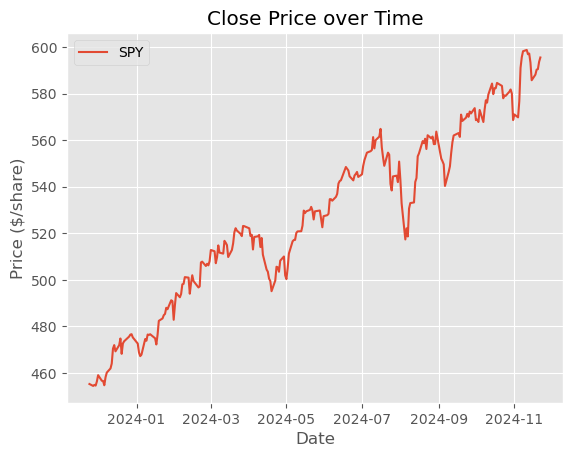

In [4]:
# Plot the 'Close' price from the DataFrame
plt.plot(df.index, df['Close'], label='SPY')

# Add title and labels
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Price ($/share)')
plt.legend()
plt.show()

In [5]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 455.29998779296875 Last 595.510009765625


Use simple returns & attempt to compute final price from starting price over time horizon

In [6]:
simple_returns.mean()

0.0010996974515766283

In [7]:
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

599.9395592594118

In [8]:
df.Close[0]*np.prod([(1+Rt) for Rt in simple_returns])

595.510009765624

#### Log Returns

Now onto one period log returns:

$r_t = \ln(1+R_t)$

K-period log returns:

$r_t(k) = \ln(1+R_t(k)) = \ln[(1+R_t)(1+R_{t-1})...(1+R_{t-k+1})]$

$r_t(k) = \ln(1+R_t(k)) = \ln(1+R_t) + \ln(1+R_{t-1}) + ... + \ln(1+R_{t-k+1})$

$r_t(k) = \ln(1+R_t(k)) = r_t + r_{t-1} + ... + r_{t-k+1} = \ln(P_t) - \ln(P_{t-k})$

Compute log returns in python

In [9]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns

Date
2023-11-27   -0.001803
2023-11-28    0.000990
2023-11-29   -0.000704
2023-11-30    0.003930
2023-12-01    0.005898
                ...   
2024-11-18    0.004089
2024-11-19    0.003649
2024-11-20    0.000339
2024-11-21    0.005354
2024-11-22    0.003095
Name: Close, Length: 251, dtype: float64

In [10]:
log_returns.mean()

0.0010695684547195024

In [11]:
df.Close[0] * np.exp(len(log_returns) * log_returns.mean())

595.510009765624

## AGAIN, THE MAIN REASON

### If we want to model returns using the normal distribution!

- SIMPLE RETURNS: The product of normally distribution variables is NOT normally distributed

- LOG RETURNS: The sum of normally distributed variables follows a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality.

#### Histogram of log returns

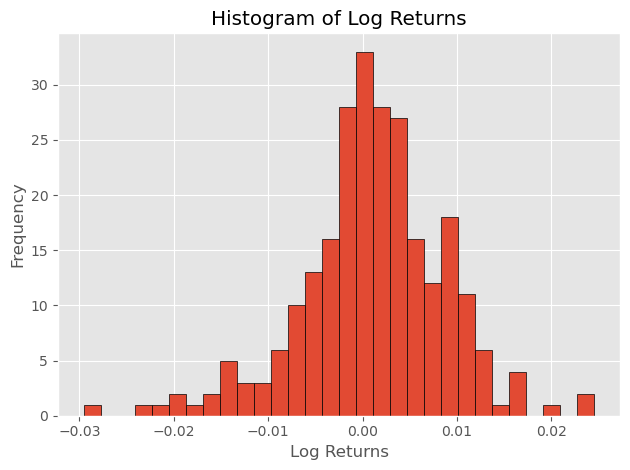

In [12]:
# Plot histogram of log_returns
plt.hist(log_returns, bins=30, edgecolor='black')  # You can adjust the number of bins

# Add title and labels
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


### Is normality a good assumption for financial data?

The assumption that prices or more accurately log returns are normally distributed!

In [13]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()
print('Assuming price is normally distributed: ')
print(' Standard dev. worst %.2f and best %.2f' %(std_worst, std_best))
print(' Probability of worst %.13f and best %.13f' %(stats.norm(0, 1).pdf(std_worst), stats.norm(0, 1).pdf(std_best)))

Assuming price is normally distributed: 
 Standard dev. worst -3.98 and best 3.05
 Probability of worst 0.0001476611787 and best 0.0038175596431


### Part 2: Testing for Normality
https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

#### Q-Q or Quantile-Quantile Plots
It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable.

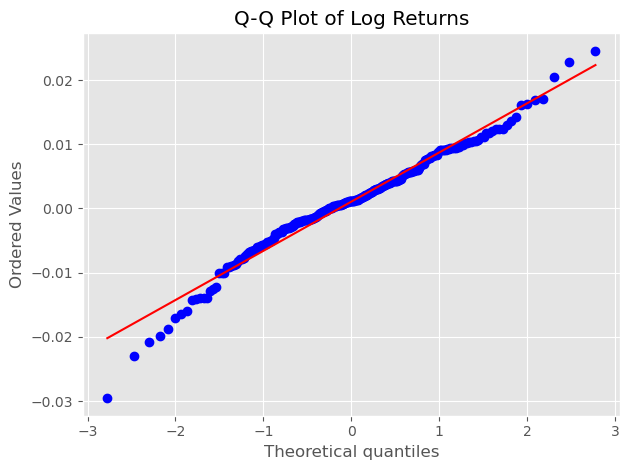

In [14]:
# Create a Q-Q plot for log_returns against a normal distribution
# plt.figure(figsize=(5, 3))  # Equivalent to width=500, height=300 in Plotly
stats.probplot(log_returns, dist="norm", plot=plt)

# Add a title
plt.title('Q-Q Plot of Log Returns')

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

#### Box Plots
Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable. It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum.

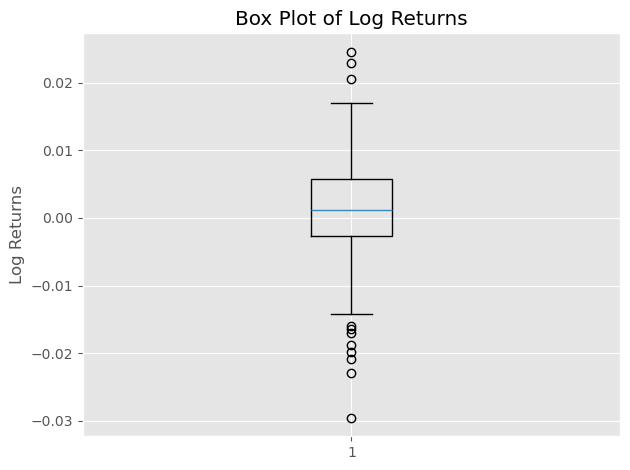

In [15]:
# Create a box plot for log_returns
plt.boxplot(log_returns)

# Add title and labels
plt.title('Box Plot of Log Returns')
plt.ylabel('Log Returns')

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Hypothesis Testing / Statistical Inference ?

Why would you do it - Can give a more objective answer!

#### Kolmogorov Smirnov test

The Kolmogorov Smirnov test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances.

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true.
If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only.

- Do not forget to assign arguments mean and standard deviation! (this was reminded by a subscriber - thanks)

In [16]:
ks_statistic, p_value = stats.kstest(log_returns, 'norm', args = (log_returns.mean(), log_returns.std()))
print(ks_statistic, p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

0.07231209326309784 0.13791180356527832
Probably Gaussian


#### Shapiro Wilk test
The Shapiro Wilk test is the most powerful test when testing for a normal distribution. It has been developed specifically for the normal distribution and it cannot be used for testing against other distributions like for example the KS test.

In [17]:
sw_stat, p = stats.shapiro(log_returns)
print('stat=%.3f, p=%.3f' % (sw_stat, p))
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.977, p=0.000
Probably Gaussian
